In [1]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

#Load voter turnout CSV file
ky_voting_data = pd.read_csv("ky_voter_turnout.csv", index_col=False, thousands=',')
ky_voting_data.sort_values('county', inplace=True)
ky_voting_data.head(10)

,county_code,county,Election_Year,total_reg,total_number_voting,total_percent_turnout,dem_reg,dem_voting,dem_percent_turnout,rep_reg,rep_voting,rep_percent_turnout,other_reg,other_voting,other_percent_turnout
0,1,ADAIR,2016,13622,8315,61.0,3815,2183,57.2,9026,5778,64.0,781,354,45.3
240,1,ADAIR,2008,12584,7548,59.9,3862,2310,59.8,8208,5015,61.0,514,223,43.3
120,1,ADAIR,2012,12762,7565,59.2,3731,2143,57.4,8398,5164,61.4,633,258,40.7
1,2,ALLEN,2016,14426,8210,56.9,4791,2503,52.2,8621,5340,61.9,1014,367,36.2
241,2,ALLEN,2008,12439,7502,60.3,4621,2769,59.9,7153,4465,62.4,665,268,40.3
121,2,ALLEN,2012,13232,7156,54.0,4698,2340,49.8,7725,4526,58.5,809,290,35.8
2,3,ANDERSON,2016,17722,11570,65.3,9803,6392,65.2,6697,4610,68.8,1222,568,46.5
242,3,ANDERSON,2008,15507,10785,69.5,10201,7249,71.0,4541,3168,69.7,765,368,48.1
122,3,ANDERSON,2012,16436,10420,63.3,10251,6623,64.6,5200,3375,64.9,985,422,42.8
3,4,BALLARD,2016,6406,4156,64.9,4482,2940,65.6,1614,1087,67.3,310,129,41.6


In [2]:
ky_voting_data.dtypes

county_code                int64
county                    object
Election_Year              int64
total_reg                  int64
total_number_voting        int64
total_percent_turnout    float64
dem_reg                    int64
dem_voting                 int64
dem_percent_turnout      float64
rep_reg                    int64
rep_voting                 int64
rep_percent_turnout      float64
other_reg                  int64
other_voting               int64
other_percent_turnout    float64
dtype: object

<h1>Kentucky Voter Turnout By Election Year & Major Political Party</h1>

In [3]:
#Connect dataframe to SQL database
con = sqlite3.connect("ky_voter_turnout_year.db")
ky_voting_data.to_sql("ky_voter_turnout_year", con, if_exists="replace")

In [4]:
ky_voting_data["Election_Year"]=ky_voting_data["Election_Year"].astype(str)

In [5]:
#Select data for analysis from SQL database; combines 2008, 2012 and 2016 data into averages of each when grouped by election year
ky_voting_info_year = pd.read_sql("""SELECT 
                                    Election_Year,
                                    ROUND(AVG(total_reg), 1) AS Total_Registered_Average,
                                    ROUND(AVG(total_number_voting), 1) AS Total_Voting_Average,
                                    ROUND(AVG(total_percent_turnout), 1) AS Turnout_Average,
                                    ROUND(AVG(dem_reg), 1) AS Total_Dem_Registered_Average,
                                    ROUND(AVG(dem_voting), 1) AS Total_Dem_Voting_Average,
                                    ROUND(AVG(dem_percent_turnout), 1) AS Dem_Turnout_Average,
                                    ROUND(AVG(rep_reg), 1) AS Total_Rep_Registered_Average,
                                    ROUND(AVG(rep_voting), 1) AS Total_Rep_Voting_Average,
                                    ROUND(AVG(rep_percent_turnout), 1) AS Rep_Turnout_Average
                                    FROM ky_voter_turnout_year
                                    GROUP BY Election_Year
                                    """, con)

Text(0.5, 1.0, 'Kentucky Democratic Voter Turnout Percentage By Election Year')

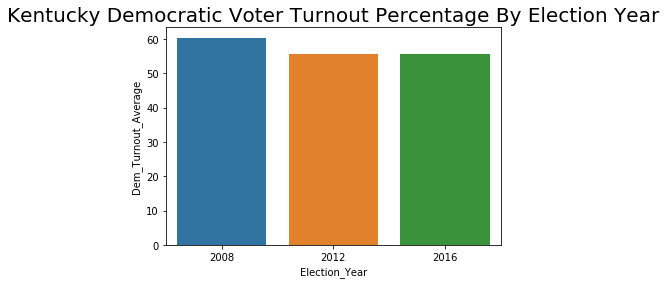

In [7]:
barplot = sb.barplot(x="Election_Year", y="Dem_Turnout_Average", data=ky_voting_info_year)

plt.title("Kentucky Democratic Voter Turnout Percentage By Election Year", fontsize=20)

Text(0.5, 1.0, 'Kentucky Republican Voter Turnout Percentage By Election Year')

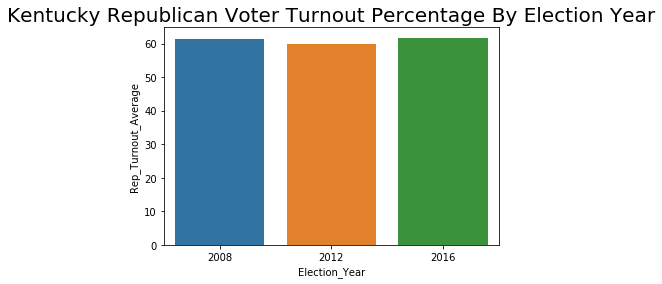

In [8]:
barplot = sb.barplot(x="Election_Year", y="Rep_Turnout_Average", data=ky_voting_info_year)

plt.title("Kentucky Republican Voter Turnout Percentage By Election Year", fontsize=20)

<h1>Correlation Between Voter Turnout and Median Household Income and Population Density</h1>

In [9]:
#Connect dataframe to SQL database
conn = sqlite3.connect("ky_voter_turnout.db")
ky_voting_data.to_sql("ky_voter_turnout", conn, if_exists="replace")

In [10]:
#Select data for analysis from SQL database; combines 2008, 2012 and 2016 data into averages of each when grouped by county
ky_voting_info = pd.read_sql("""SELECT
                                    county,
                                    ROUND(AVG(total_reg), 1) AS Total_Registered_Average,
                                    ROUND(AVG(total_number_voting), 1) AS Total_Voting_Average,
                                    ROUND(AVG(total_percent_turnout), 1) AS Turnout_Average,
                                    ROUND(AVG(dem_reg), 1) AS Total_Dem_Registered_Average,
                                    ROUND(AVG(dem_voting), 1) AS Total_Dem_Voting_Average,
                                    ROUND(AVG(dem_percent_turnout), 1) AS Dem_Turnout_Average,
                                    ROUND(AVG(rep_reg), 1) AS Total_Rep_Registered_Average,
                                    ROUND(AVG(rep_voting), 1) AS Total_Rep_Voting_Average,
                                    ROUND(AVG(rep_percent_turnout), 1) AS Rep_Turnout_Average
                                    FROM ky_voter_turnout
                                    GROUP BY county
                                    """, conn)

In [11]:
ky_voting_info.head(5)

,county,Total_Registered_Average,Total_Voting_Average,Turnout_Average,Total_Dem_Registered_Average,Total_Dem_Voting_Average,Dem_Turnout_Average,Total_Rep_Registered_Average,Total_Rep_Voting_Average,Rep_Turnout_Average
0,ADAIR,12989.3,7809.3,60.0,3802.7,2212.0,58.1,8544.0,5319.0,62.1
1,ALLEN,13365.7,7622.7,57.1,4703.3,2537.3,54.0,7833.0,4777.0,60.9
2,ANDERSON,16555.0,10925.0,66.0,10085.0,6754.7,66.9,5479.3,3717.7,67.8
3,BALLARD,6169.3,4056.0,65.7,4734.0,3179.7,67.1,1195.7,780.3,64.8
4,BARREN,28799.7,17549.3,60.9,16497.0,9930.0,60.1,10617.0,6905.0,65.1


In [12]:
#Load CSV file containing median income and population density data
ky_income_pop_density = pd.read_csv("ky_median_income_pop_density.csv", index_col=False)
ky_income_pop_density.head(5)

,county,median_household_income,land area,population,density
0,"Adair County, Kentucky",24055,405,18656,46
1,"Allen County, Kentucky",31238,344,19956,58
2,"Anderson County, Kentucky",45433,202,21421,106
3,"Ballard County, Kentucky",32130,247,8249,33
4,"Barren County, Kentucky",31240,488,42173,87


In [13]:
ky_income_pop_density['county'] = ky_income_pop_density['county'].str.replace(' County, Kentucky','').str.upper()

In [14]:
ky_income_pop_density.head(5)

,county,median_household_income,land area,population,density
0,ADAIR,24055,405,18656,46
1,ALLEN,31238,344,19956,58
2,ANDERSON,45433,202,21421,106
3,BALLARD,32130,247,8249,33
4,BARREN,31240,488,42173,87


In [15]:
#Merge voter turnout and population density, median income dataframes
kentucky_voting_data = pd.merge(ky_voting_info, ky_income_pop_density, on='county')

In [16]:
kentucky_voting_data.rename(index=str, columns=
                                        {"county": "County",
                                        "Total_Registered_Average": "Total Registered Average",
                                        "Total_Voting_Average": "Total Voting Average",
                                        "Turnout_Average": "Total Turnout Percentage",
                                        "median_household_income": "Median Household Income",
                                        "land area": "Land Area",
                                        "population": "Population",
                                        "density": "Density",
                                        "Total_Rep_Registered_Average": "Average Registered Republicans",
                                        "Total_Rep_Voting_Average": "Average Republican Turnout",
                                        "Rep_Turnout_Average": "Republican Turnout Average",
                                        "Total_Dem_Registered_Average": "Average Registered Democrats",
                                        "Total_Dem_Voting_Average": "Average Democrat Turnout",
                                        "Dem_Turnout_Average": "Democrat Turnout Average"
                                        }, inplace=True)

In [17]:
#New dataframe to use for analysis
kentucky_voting_data

,County,Total Registered Average,Total Voting Average,Total Turnout Percentage,Average Registered Democrats,Average Democrat Turnout,Democrat Turnout Average,Average Registered Republicans,Average Republican Turnout,Republican Turnout Average,Median Household Income,Land Area,Population,Density
0,ADAIR,12989.3,7809.3,60.0,3802.7,2212.0,58.1,8544.0,5319.0,62.1,24055,405,18656,46
1,ALLEN,13365.7,7622.7,57.1,4703.3,2537.3,54.0,7833.0,4777.0,60.9,31238,344,19956,58
2,ANDERSON,16555.0,10925.0,66.0,10085.0,6754.7,66.9,5479.3,3717.7,67.8,45433,202,21421,106
3,BALLARD,6169.3,4056.0,65.7,4734.0,3179.7,67.1,1195.7,780.3,64.8,32130,247,8249,33
4,BARREN,28799.7,17549.3,60.9,16497.0,9930.0,60.1,10617.0,6905.0,65.1,31240,488,42173,87
5,BATH,8886.0,4611.7,51.9,7335.0,3813.7,51.9,1230.7,687.0,55.6,26018,279,11591,42
6,BELL,20489.3,9877.0,48.2,9478.7,4165.7,43.8,10167.0,5433.0,53.4,19057,359,28691,80
7,BOONE,88025.7,54364.3,62.0,30677.0,17903.7,58.5,46236.3,30850.7,67.0,53593,246,118811,482
8,BOURBON,13819.7,8461.7,61.2,9368.3,5881.7,62.7,3645.3,2240.7,61.2,35038,290,19985,69
9,BOYD,37254.0,20438.3,54.9,21525.3,11532.3,53.5,12937.3,7816.3,60.5,32749,160,49542,310


In [18]:
kentucky_voting_data.describe()

,Total Registered Average,Total Voting Average,Total Turnout Percentage,Average Registered Democrats,Average Democrat Turnout,Democrat Turnout Average,Average Registered Republicans,Average Republican Turnout,Republican Turnout Average,Median Household Income,Land Area,Population,Density
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,25694.671667,15642.570833,58.340833,13949.234167,8494.885833,57.176667,9842.377500,6258.062500,60.939167,30321.633333,329.058333,36161.391667,117.316667
std,53115.786167,34767.784148,5.608449,30319.949990,20175.154410,7.225163,18454.367218,12407.896564,5.611323,8444.065350,129.141268,74122.757215,223.634831
min,1723.700000,1008.700000,46.000000,896.300000,416.700000,39.300000,269.700000,141.700000,43.800000,15805.000000,100.000000,2282.000000,20.000000
25%,8817.925000,4908.050000,53.700000,4374.200000,2477.300000,51.350000,2800.225000,1693.025000,57.350000,23435.750000,234.000000,12385.250000,39.000000
50%,12972.150000,7685.850000,59.200000,7427.350000,4396.650000,58.100000,5685.350000,3568.850000,61.050000,30291.000000,305.500000,18751.000000,60.000000
75%,24918.075000,15821.675000,62.050000,15153.925000,8049.100000,62.750000,9057.175000,5602.575000,65.275000,35652.750000,410.500000,35619.000000,96.250000
max,535978.000000,351331.300000,70.200000,312513.000000,208239.700000,70.800000,174863.300000,117719.300000,74.100000,63229.000000,787.000000,741096.000000,1948.000000


<h2>Median Income and Voter Turnout by County</h2>

In [43]:
#correlation coefficient
kentucky_voting_data['Total Turnout Percentage'].corr(kentucky_voting_data['Median Household Income'])

0.7461096273328093

Text(0.5, 1.0, 'Total Voter Turnout and Median Income')

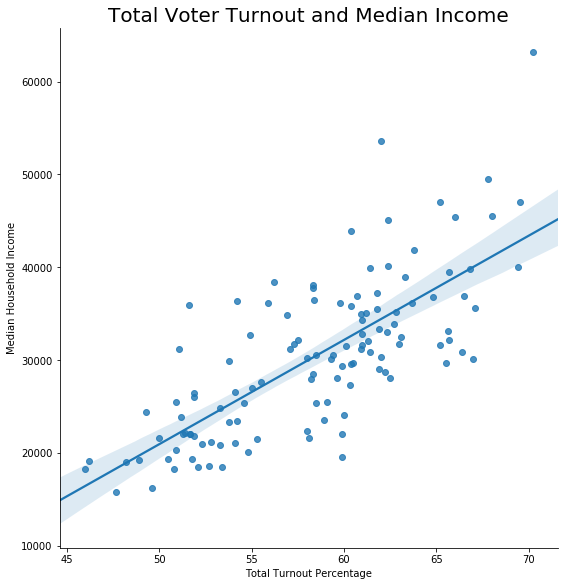

In [37]:
voter_turnout_income_scat = sb.lmplot(
                        x="Total Turnout Percentage", 
                        y="Median Household Income", 
                        data=kentucky_voting_data,
                        height=8
                        )

plt.title("Total Voter Turnout and Median Income", fontsize=20)

Text(0.5, 1.0, 'Democratic Voter Turnout and Median Income')

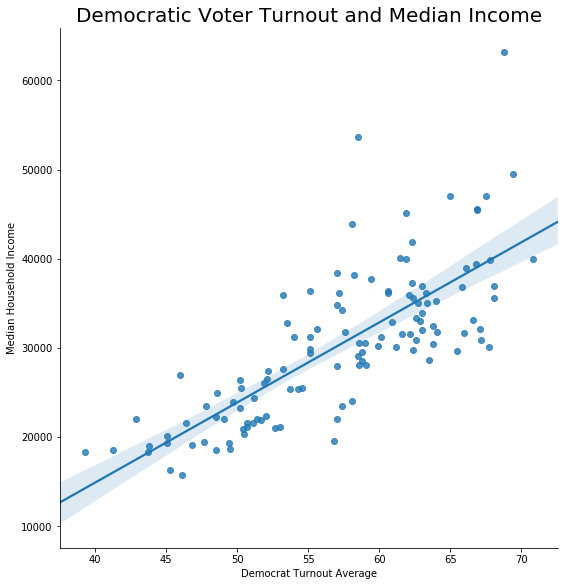

In [38]:
democrat_voter_turnout_income_scat = sb.lmplot(
                        x="Democrat Turnout Average", 
                        y="Median Household Income",
                        data=kentucky_voting_data,
                        height=8,
                        )

plt.title("Democratic Voter Turnout and Median Income", fontsize=20)

Text(0.5, 1.0, 'Republican Voter Turnout and Median Income')

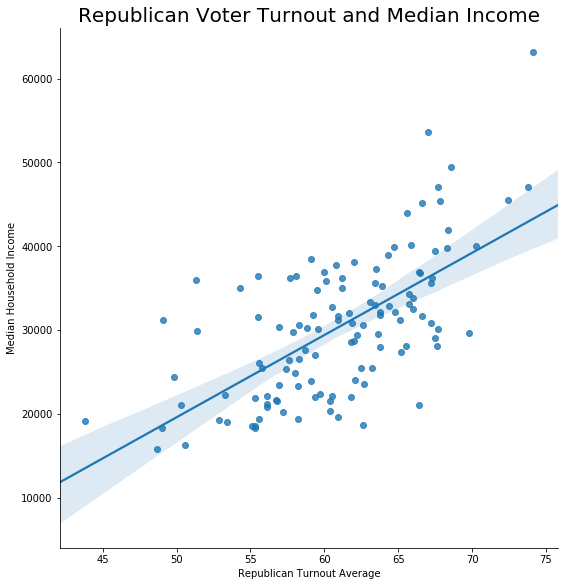

In [39]:
republican_voter_turnout_income_scat = sb.lmplot(
                        x="Republican Turnout Average", 
                        y="Median Household Income", 
                        data=kentucky_voting_data,
                        height=8
                        )

plt.title("Republican Voter Turnout and Median Income", fontsize=20)

<h2>Population Density and Voter Turnout by County</h2>

In [44]:
#correlation coefficient
kentucky_voting_data['Total Turnout Percentage'].corr(kentucky_voting_data['Density'])

0.2835383500912103

Text(0.5, 1.0, 'Total Voter Turnout and Population Density')

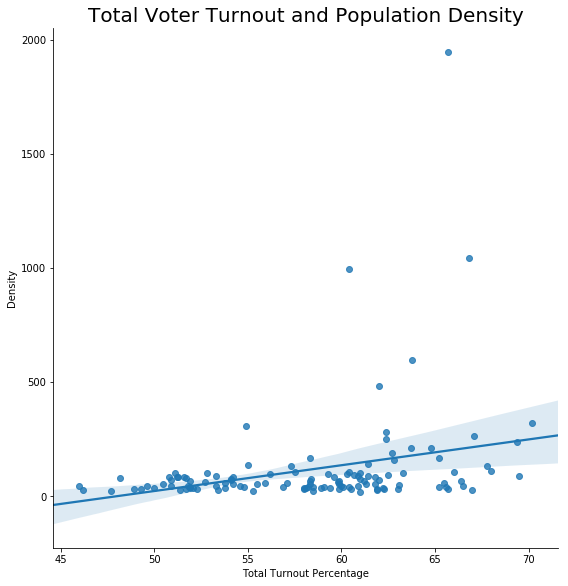

In [36]:
voter_turnout_popdensity_scatplot = sb.lmplot(
                    x="Total Turnout Percentage", 
                    y="Density", 
                    data=kentucky_voting_data,
                    height=8
                    )

plt.title("Total Voter Turnout and Population Density", fontsize=20)

Text(0.5, 1.0, 'Democratic Voter Turnout and Population Density')

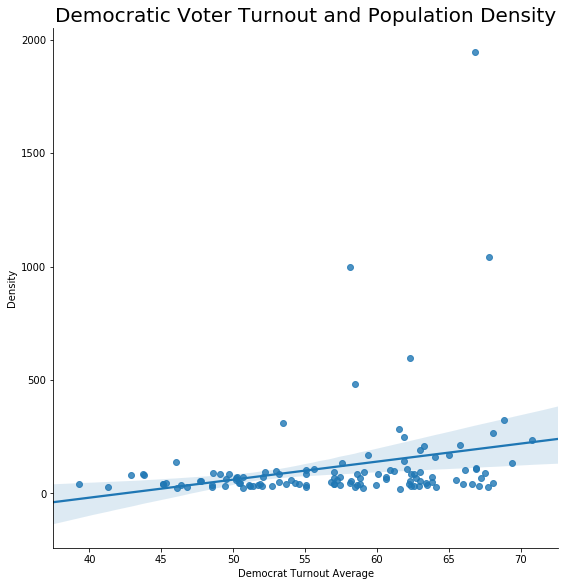

In [40]:
democrat_turnout_popdensity_scatplot = sb.lmplot(
                        x="Democrat Turnout Average", 
                        y="Density",
                        data=kentucky_voting_data,
                        height=8
                        )

plt.title("Democratic Voter Turnout and Population Density", fontsize=20)

Text(0.5, 1.0, 'Republican Voter Turnout and Population Density')

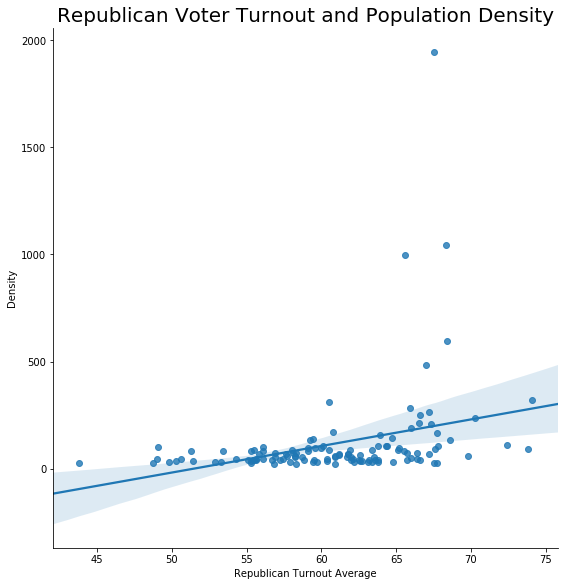

In [41]:
republican_turnout_popdensity_scatplot = sb.lmplot(
                        x="Republican Turnout Average", 
                        y="Density",
                        data=kentucky_voting_data,
                        height=8
                        )

plt.title("Republican Voter Turnout and Population Density", fontsize=20)

<h1>Conclusion</h1>

Prior to this analysis, I was expecting to find positive correlations between voter turnout (the greater the median income, the greater the voter turnout) and median income and voter turnout and population density (the greater the population density, the greater the voter turnout). After viewing the results, it is evident only one of these variables correlates with voter turnout. 

The scatter plots show as household median income rises, so too does the voter turnout in the county. This is true regardless of party affiliation. The correlation coefficient for total voter turnout and median household income is .75. 

Conversely, it appears population density has little effect on voter turnout in Kentucky. The correlation coefficient between total voter turnout and population density is .28. 